# Load Data (5 points)
* Pick an image dataset from [here](http://deeplearning.net/datasets/)
* Not MNIST or CIFAR
    * This will allow you to get practice loading not Keras datasets

In [59]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tarfile
import gzip
import idx2numpy
import cv2 as cv
import struct

In [1]:
def load_mnist_fashion(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

x_train, y_train = load_mnist_fashion('Data', kind='train')
x_test, y_test = load_mnist_fashion('Data', kind='t10k')
type(x_train)

numpy.ndarray

# Autoencoders (10 points)
* Build an autoencoder and train it on the image dataset you chose

In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256,shuffle=True, validation_data=(x_test, x_test))
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.5241 - acc: 0.4517 - val_loss: 0.4533 - val_acc: 0.4827
Epoch 2/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.4227 - acc: 0.4888 - val_loss: 0.4051 - val_acc: 0.4883
Epoch 3/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.3946 - acc: 0.4919 - val_loss: 0.3872 - val_acc: 0.4911
Epoch 4/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.3779 - acc: 0.4947 - val_loss: 0.3721 - val_acc: 0.4939
Epoch 5/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.3642 - acc: 0.4970 - val_loss: 0.3601 - val_acc: 0.4962
Epoch 6/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.3534 - acc: 0.4989 - val_loss: 0.3504 - val_acc: 0.4973
Epoch 7/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.3445 - acc: 0.5005 - val_loss: 0.3425 - val_acc

# Metrics (5 points)
* Report the loss and validation loss over time

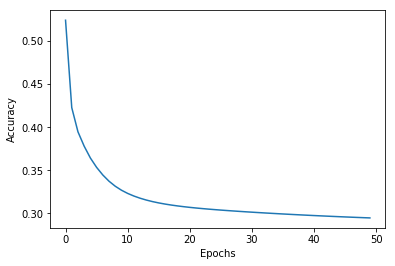

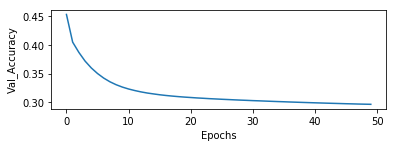

In [12]:
temp_acc = autoencoder.history.history['acc']
val_temp_acc = autoencoder.history.history['val_acc']
temp_loss = autoencoder.history.history['loss']
val_temp_loss = autoencoder.history.history['val_loss']

plt.subplot(1,1,1)
plt.plot(temp_loss)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

plt.subplot(2,1,1)
plt.plot(val_temp_loss)
plt.xlabel("Epochs")
plt.ylabel("Val_Accuracy")
plt.show()

# Results (5 points)
* Show a reconstructed image side by side with the real image

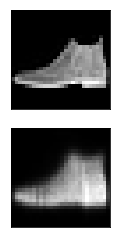

In [13]:
n = 1 # show many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Autoencoder
* Build another autoencoder and train it on MNIST
* You can use as many layers as you want but the middle (bottleneck) can only have **2** nodes
* We want to visualize these two *latent dimensions*
* **HINT:** You're going to have to pass an image through the network but instead of the reconstructed image we want to the intermediate output in the middle of the network

In [56]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train
* Train this network again as you did before

In [63]:
encoding_dim = 32 

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256,shuffle=True, validation_data=(x_test, x_test))
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs
#Ignore the commented out section
'''
encoder_temp = Sequential()
encoder_temp.add(Conv2D(32, stride=2, activation='relu')(input_img))
encoder_temp.add(Flatten())
encoder_temp.add(Dense(2, activation='softmax'))

decoder_temp = Sequential()
decoder_temp.add(Conv2D(32, activation='sigmoid')(encoder_temp))

autoencoder_temp = Model(input_img, decoder_temp)
'''

SyntaxError: invalid syntax (<ipython-input-63-d74f9f8fb9cf>, line 27)

# Visualization Part 1
* You will pass 100 examples from each digit type through the network (100 * 10 total images)
* For each image you will record the output at the 2 nodes (in the middle of your network)
* These will get plotted on a graph
* You must color each point according to its class membership (i.e. all 0's colored red, all 1's colored blue, etc.)

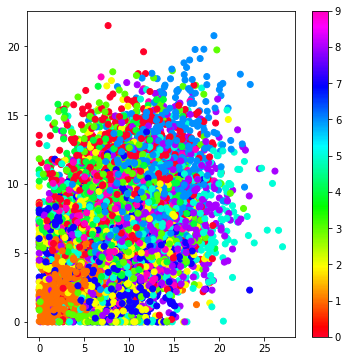

In [58]:
x_test_latent = encoder.predict(x_test, batch_size=100)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_latent[:, 0], x_test_latent[:, 1], c=y_test, cmap='gist_rainbow')
plt.colorbar()
plt.show()

# Extra Credit (10 points)
---
# Variational Autoencoder
* Implement
* Train
* Visualize latent dimension

In [53]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import objectives
from scipy.stats import norm

(x_tr, y_tr), (x_te, y_te) = mnist.load_data()
x_tr, x_te = x_tr.astype('float32')/255., x_te.astype('float32')/255.
x_tr, x_te = x_tr.reshape(x_tr.shape[0], -1), x_te.reshape(x_te.shape[0], -1)

# network parameters
batch_size, n_epoch = 100, 100
n_hidden, z_dim = 256, 2

x = Input(shape=(x_tr.shape[1:]))
x_encoded = Dense(n_hidden, activation='relu')(x)
x_encoded = Dense(n_hidden//2, activation='relu')(x_encoded)

mu = Dense(z_dim)(x_encoded)
log_var = Dense(z_dim)(x_encoded)

def sampling(args):
    mu, log_var = args
    eps = K.random_normal(shape=(batch_size, z_dim), mean=0., stddev=1.0)
    return mu + K.exp(log_var) * eps

z = Lambda(sampling, output_shape=(z_dim,))([mu, log_var])

z_decoder1 = Dense(n_hidden//2, activation='relu')
z_decoder2 = Dense(n_hidden, activation='relu')
y_decoder = Dense(x_tr.shape[1], activation='sigmoid')

z_decoded = z_decoder1(z)
z_decoded = z_decoder2(z_decoded)
y = y_decoder(z_decoded)

reconstruction_loss = objectives.binary_crossentropy(x, y) * x_tr.shape[1]
kl_loss = 0.5 * K.sum(K.square(mu) + K.exp(log_var) - log_var - 1, axis = -1)
vae_loss = reconstruction_loss + kl_loss

# build model
vae = Model(x, y)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop', metrics=['accuracy'])
vae.fit(x_tr,
       shuffle=True,
       epochs=25,
       batch_size=batch_size,
       validation_data=(x_te, None), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 9s 144us/step - loss: 189.5636 - val_loss: 166.7383
Epoch 2/25
60000/60000 [==============================] - 7s 120us/step - loss: 162.3326 - val_loss: 158.9610
Epoch 3/25
60000/60000 [==============================] - 7s 123us/step - loss: 157.0098 - val_loss: 154.7630
Epoch 4/25
60000/60000 [==============================] - 7s 125us/step - loss: 153.3629 - val_loss: 152.3031
Epoch 5/25
60000/60000 [==============================] - 8s 128us/step - loss: 150.8991 - val_loss: 150.7022
Epoch 6/25
60000/60000 [==============================] - 8s 126us/step - loss: 149.0515 - val_loss: 148.5273
Epoch 7/25
60000/60000 [==============================] - 8s 126us/step - loss: 147.3790 - val_loss: 147.0562
Epoch 8/25
60000/60000 [==============================] - 7s 124us/step - loss: 146.1311 - val_loss: 145.8905
Epoch 9/25
60000/60000 [==============================] - 8s 127us/ste

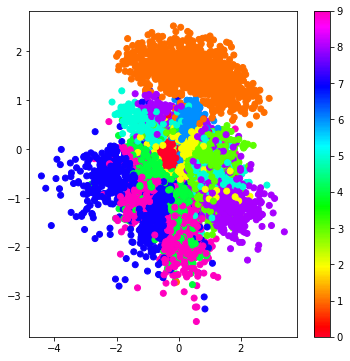

In [54]:
encoder = Model(x, mu)

x_te_latent = encoder.predict(x_te, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_te_latent[:, 0], x_te_latent[:, 1], c=y_te, cmap='gist_rainbow')
plt.colorbar()
plt.show()

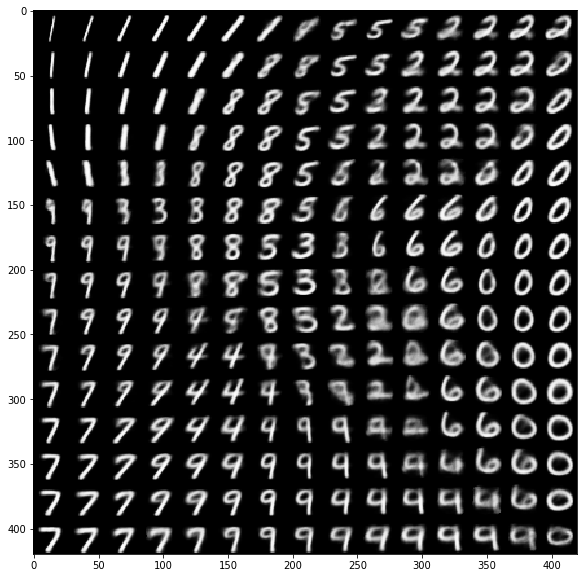

In [18]:
decoder_input = Input(shape=(z_dim,))
_z_decoded = z_decoder1(decoder_input)
_z_decoded = z_decoder2(_z_decoded)
_y = y_decoder(_z_decoded)
generator = Model(decoder_input, _y)

n = 15 # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = norm.ppf(np.linspace(0.05, 0.95, n)) 
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()